## Notebook 2. 

We will perform the same modelling as in Notebook 1 but using only the counts during the wet season (May - October). This is because we are likely to conduct our releases during the wet season hence we should focus more on this duration. Another reason is that including the dry season counts (with many 0 entires) may have bad impact on the models we built. 

In [1]:
# LOAD R PACKAGES
require(compiler)
enableJIT(3)
setMKLthreads(22)
require(lme4)
require(lmerTest)
require(MASS)

# LOAD DATASET dat1
#setwd('variance/Florian')
load('Per house data PSC 2012 to 2019 polish2.RData')
ls()
dim(dat1)

Loading required package: compiler


[1] 3

Loading required package: lme4
Loading required package: Matrix
Loading required package: lmerTest

Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Loading required package: MASS


[1] "dat1"

[1] 3212   26

In [2]:
# SUBSET (MAY-OCTOBER ONLY)
dat1<-dat1[dat1$month.assigned %in% 5:10,]
# dat1 GOT OVER-WRITTEN SO YOU NEED TO BE CAREFUL. 
dim(dat1)
# LOOK AT THE FIRST FEW ROWS OF THE COUNT DATA
head(dat1)

[1] 1626   26

village,month.assigned,year.assigned,monthyear.assigned,day,month,year,date.collection,site.id,longitude,...,count.m,genotyped.m,col.m,gam.m,arab.m,count.f,genotyped.f,col.f,gam.f,arab.f
Bana market,7,2012,07/2012,28,7,2012,2012-07-28,BF.BM.02.001,-4.471190,...,1,NA,NA,NA,NA,7,NA,NA,NA,NA
Bana market,7,2012,07/2012,28,7,2012,2012-07-28,BF.BM.03.001,-4.471004,...,0,NA,NA,NA,NA,6,NA,NA,NA,NA
Bana market,7,2012,07/2012,28,7,2012,2012-07-28,BF.BM.13.001,-4.470798,...,0,NA,NA,NA,NA,12,NA,NA,NA,NA
Bana market,7,2012,07/2012,28,7,2012,2012-07-28,BF.BM.16.001,-4.482247,...,2,NA,NA,NA,NA,25,NA,NA,NA,NA
Bana market,7,2012,07/2012,28,7,2012,2012-07-28,BF.BM.27.001,-4.485166,...,3,NA,NA,NA,NA,40,NA,NA,NA,NA
Bana market,7,2012,07/2012,28,7,2012,2012-07-28,BF.BM.31.001,-4.482649,...,2,NA,NA,NA,NA,14,NA,NA,NA,NA


Obviously choosing only wet season counts will reduce the number of data points (from 3212 to 1626 rows). It has no impact on the number of columns (variables). We can run some descriptive stats like we did before. 

### Descriptive statistics

In [3]:
# SOME DESCRIPTIVE STATISTICS ON THE RESPONSE VARIABLE, THAT IS, FEMALE MOSQUITO COUNT
cat('overall summary of count')
summary(dat1$count.f)
cat('mean count per month')
by(dat1$count.f, dat1$month.assigned, mean, na.rm=T)
cat('mean count per year')
by(dat1$count.f, dat1$year.assigned, mean, na.rm=T)
cat('mean count per village')
by(dat1$count.f, dat1$village, mean, na.rm=T)

overall summary of count

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    2.00    6.00   15.81   17.00  333.00      12 

mean count per month

dat1$month.assigned: 1
[1] NA
------------------------------------------------------------ 
dat1$month.assigned: 2
[1] NA
------------------------------------------------------------ 
dat1$month.assigned: 3
[1] NA
------------------------------------------------------------ 
dat1$month.assigned: 4
[1] NA
------------------------------------------------------------ 
dat1$month.assigned: 5
[1] 16.57831
------------------------------------------------------------ 
dat1$month.assigned: 6
[1] 9.812139
------------------------------------------------------------ 
dat1$month.assigned: 7
[1] 15.21667
------------------------------------------------------------ 
dat1$month.assigned: 8
[1] 14.49857
------------------------------------------------------------ 
dat1$month.assigned: 9
[1] 26.59649
------------------------------------------------------------ 
dat1$month.assigned: 10
[1] 15.98261
------------------------------------------------------------ 
dat1$month.assigned: 11
[1] NA
------------

mean count per year

dat1$year.assigned: 2012
[1] 28.27308
------------------------------------------------------------ 
dat1$year.assigned: 2013
[1] 16.19429
------------------------------------------------------------ 
dat1$year.assigned: 2014
[1] 9.402878
------------------------------------------------------------ 
dat1$year.assigned: 2017
[1] 13.15132
------------------------------------------------------------ 
dat1$year.assigned: 2018
[1] 12.84746
------------------------------------------------------------ 
dat1$year.assigned: 2019
[1] 12.81955

mean count per village

dat1$village: Bana market
[1] 16.81724
------------------------------------------------------------ 
dat1$village: Bana village
[1] 22.45911
------------------------------------------------------------ 
dat1$village: Pala
[1] 11.81
------------------------------------------------------------ 
dat1$village: Souroukoudingan
[1] 9.948187

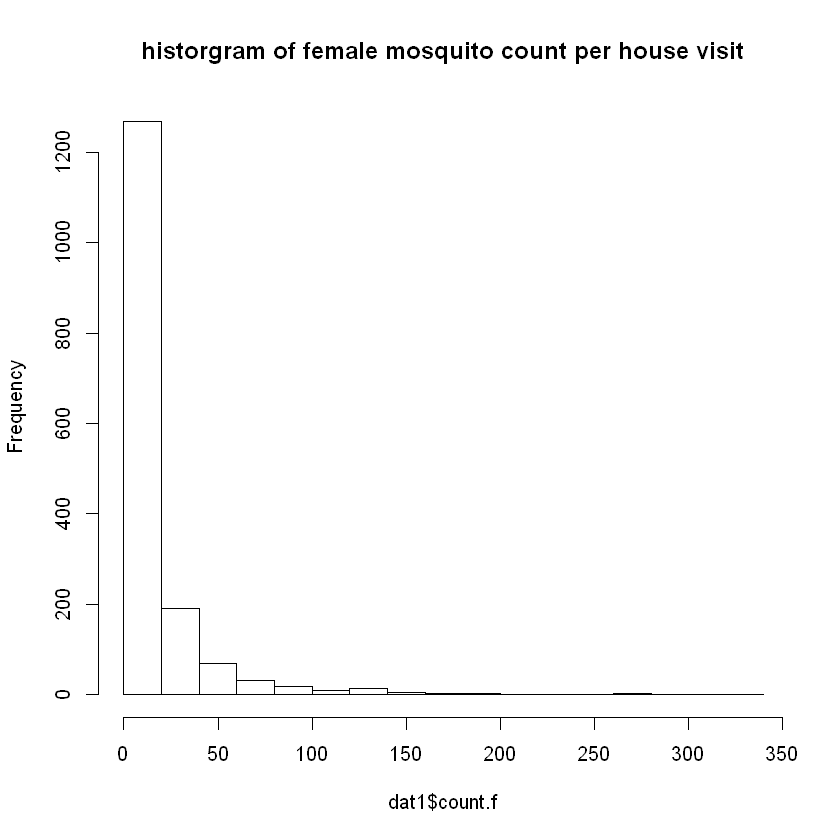

In [4]:
# HISTOGRAM OF THE RESPONSE
hist(dat1$count.f, main='historgram of female mosquito count per house visit')

In [5]:
# DESCRIPTIVE STATS ON SOME EXPLANATORY VARIABLES AS WELL
cat('number of unqiue days of data collection')
length(unique(dat1$date.collection))
cat('number of unique houses we visited')
length(unique(dat1$site.id))
cat('summary of mosquito.net')
by(dat1$mosquito.net, dat1$village, summary)
cat('summary of number of persons in house')
summary(dat1$num.persons)

number of unqiue days of data collection

[1] 81

number of unique houses we visited

[1] 284

summary of mosquito.net

dat1$village: Bana market
  No  Yes NA's 
  25  263    4 
------------------------------------------------------------ 
dat1$village: Bana village
  No  Yes NA's 
  34  491   19 
------------------------------------------------------------ 
dat1$village: Pala
  No  Yes NA's 
  75  321    4 
------------------------------------------------------------ 
dat1$village: Souroukoudingan
  No  Yes NA's 
  27  360    3 

summary of number of persons in house

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   2.000   3.000   3.182   4.000  16.000      38 

The mean counts are of course higher when we only include data points from the wet season. 

### Modelling

#### Model 3 and 4B
Let us go straight to model 3 and 4B in Notebook 1. Model 3 is the poisson glm models with month.assigned x village. Model 4B has mosquito.net and persons.status as well. All random effects are here to stay. 

In [6]:
# MODEL 3
overdispersion<-1:nrow(dat1)
m_3<-glmer(count.f~(1|year.assigned)+(1|site.id)+(1|overdispersion)+month.assigned*village, 
             family='poisson', data=dat1, 
             control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))
summary(m_3)


Correlation matrix not shown by default, as p = 24 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
count.f ~ (1 | year.assigned) + (1 | site.id) + (1 | overdispersion) +  
    month.assigned * village
   Data: dat1
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 11479.6  11625.0  -5712.8  11425.6     1587 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.42272 -0.32400 -0.01219  0.12854  0.56574 

Random effects:
 Groups         Name        Variance Std.Dev.
 overdispersion (Intercept) 1.2481   1.1172  
 site.id        (Intercept) 0.4658   0.6825  
 year.assigned  (Intercept) 0.1259   0.3548  
Number of obs: 1614, groups:  
overdispersion, 1614; site.id, 284; year.assigned, 6

Fixed effects:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              1.98491    0.30832   6.438 1.21e-10
month.assigned6   

In [7]:
# MODEL 4B
# THREE LEVELS OF PERSONS: None, Low, Hi. 
dat1$persons.status<-dat1$num.persons
dat1$persons.status[dat1$num.persons>3]<-'Hi'
dat1$persons.status[dat1$num.persons<=3]<-'Low'
dat1$persons.status[dat1$num.persons==0]<-'None'
dat1$persons.status<-factor(dat1$persons.status, levels=c('None', 'Low', 'Hi'))
overdispersion<-1:nrow(dat1)
m_4B<-glmer(count.f~(1|year.assigned)+(1|site.id)+(1|overdispersion)+month.assigned*village+mosquito.net+persons.status, 
             family='poisson', data=dat1, 
             control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))
summary(m_4B, correlation=FALSE)


Correlation matrix not shown by default, as p = 27 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
count.f ~ (1 | year.assigned) + (1 | site.id) + (1 | overdispersion) +  
    month.assigned * village + mosquito.net + persons.status
   Data: dat1
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 11207.0  11367.9  -5573.5  11147.0     1551 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.39317 -0.32426 -0.01092  0.12816  0.58715 

Random effects:
 Groups         Name        Variance Std.Dev.
 overdispersion (Intercept) 1.2350   1.1113  
 site.id        (Intercept) 0.4070   0.6380  
 year.assigned  (Intercept) 0.1096   0.3311  
Number of obs: 1581, groups:  
overdispersion, 1581; site.id, 278; year.assigned, 6

Fixed effects:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              1.22601    0.56217   2

Again, we need to look at what happened to the counts from Pala, month 05. 

#### Model 5 using male count as covariate
Another possible covariate I want to explore is the male mosquito count observed during the same house visit. I believe the female and male counts are (positively) correlated, and hope that knowing the male counts may give information on the female counts. Note that in an earlier exercise we know that the male counts are usually much lower. I use log(dat$count.m+1) as the covariate. I use log(x+1) as the "plus one" is to avoid log(0) while transforming. 

Just before fitting a model I want to plot a scatter plot between the male and female counts (in log scale). 

[1] 0.5799666

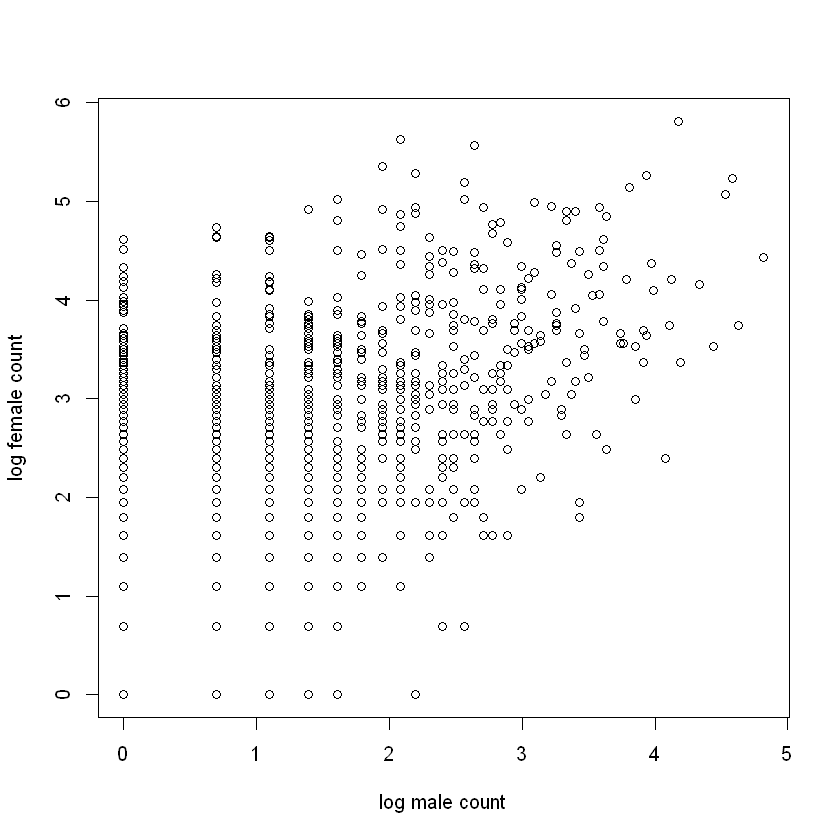

In [8]:
# SCATTER PLOT OF (LOG) FEMALE AGAINST MALE COUNT
plot(log(dat1$count.m+1), log(dat1$count.f+1), xlab='log male count', ylab='log female count')
# CORRELATION COEFFICIENT
cor(log(dat1$count.m+1), log(dat1$count.f+1), use='pairwise')

The plot and the correlation coefficient (+0.58) confirm the positive relationship between the two log counts. Now, let's build model 5 with this additional covariate: 

In [9]:
# MODEL 5, ADD LOG OF MALE COUNT AS COVARIATE
# I ALSO CHECKED (NOT SHOWN) THAT THE INTERACTION TERM IS TO STAY
overdispersion<-1:nrow(dat1)
log.count.m<-log(dat1$count.m+1)
m_5<-glmer(count.f~(1|year.assigned)+(1|site.id)+(1|overdispersion)+month.assigned*village+mosquito.net+persons.status+log.count.m, 
             family='poisson', data=dat1, 
             control=glmerControl(optimizer="bobyqa",optCtrl=list(maxfun=2e5)))
summary(m_5)


Correlation matrix not shown by default, as p = 28 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: 
count.f ~ (1 | year.assigned) + (1 | site.id) + (1 | overdispersion) +  
    month.assigned * village + mosquito.net + persons.status +      log.count.m
   Data: dat1
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 2e+05))

     AIC      BIC   logLik deviance df.resid 
 10713.8  10880.1  -5325.9  10651.8     1550 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.45851 -0.35726 -0.02856  0.16034  0.72388 

Random effects:
 Groups         Name        Variance Std.Dev.
 overdispersion (Intercept) 0.87693  0.9364  
 site.id        (Intercept) 0.17834  0.4223  
 year.assigned  (Intercept) 0.02924  0.1710  
Number of obs: 1581, groups:  
overdispersion, 1581; site.id, 278; year.assigned, 6

Fixed effects:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              0.6

We can see that the log male count from the same house visit is highly significant. It reduces the variances of all 3 random effects, and it almost removes yearly effect. 

Our releases intend to reduce the number of female mosquitoes (coluzzii in particular) but will not impact the male's population. If this is assumption is correct then having male count as a covariate can increase the power to detect the difference pre- and post-intervention. 

In the meeting some suggested that the two variables are so closely related and we should study the ratio between the two (through binomial glm for example). In Notebook 4 I will do some modelling on proportions. My feeling is the ratio (or the reduction in ratio) is not as sensitive as the count. One reason is that the male/female ratio is heavily skewed, and that any changes in the ratio will be difficult to be detected. 

### Conclusion
The variance estimates of the random effects are quite consistent thoughout. Over-dispersion remains the largest component, followed by site.id (individual house effect) and yearly effect. Including male mosquito count as covariate reduces all the variance estimates, which will be useful in power analysis. 

For the main effects, more persons within a house increases the rate. Mosquito net decreases the rate but only by a little (not quite significant). For the villages, Souroukoudingan has the lowest rate and this effect is significant. The interaction between village and month.asigned exists. The significance of the terms are quite sensitive to which subset you choose to analyse. 

The next step is to use Models 5 or 6 to simulate some mosquito counts, and see if they are close to what we observed. 

The next notebook tries to incorporate weather station info to the analysis. 